# Deep Learning With PyTorch 8 - Logistic Regression

## General training pipeline in pytorch

1) Design model (input size, outptu size, forward pass)<br> 
2) Construct loss and optimizer<br> 
3) Training loop<br>

- forward pass: compute the prediction
- backward pass: gradients
- Update weights
- iterate until we're done!

In [12]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

epoch: 100, loss = 0.2240
epoch: 200, loss = 0.1684
epoch: 300, loss = 0.1418
epoch: 400, loss = 0.1258
epoch: 500, loss = 0.1149
epoch: 600, loss = 0.1068
epoch: 700, loss = 0.1006
epoch: 800, loss = 0.0956
epoch: 900, loss = 0.0915
epoch: 1000, loss = 0.0880
accuracy = 0.9386


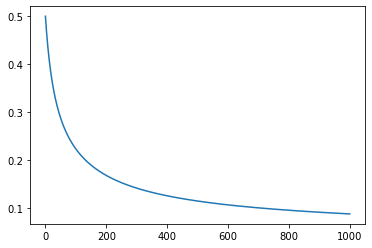

In [16]:
# 0) data
losses = []
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1) model
# f = wx + b, sigmoid at end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
model = LogisticRegression(n_features)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # forward pass and loss calculation
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # updates
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"epoch: {epoch+1}, loss = {loss.item():.4f}")

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
plt.plot(losses)
print(f"accuracy = {acc:.4f}")